In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import scanpy.external as sce
from matplotlib.pyplot import rc_context

In [2]:
adata = sc.read("/Users/athib/Desktop/CovidRSV/scRNA2/HarmonyCorrected.h5ad")

In [8]:
sc.set_figure_params(dpi=100, color_map = 'viridis')
sc.settings.verbosity = 3

In [4]:
B = adata[adata.obs['leiden'].isin(['24','3','7', '23', '25'])].copy()
sc.pp.neighbors(B, use_rep="X_pca_harmony")
sc.tl.umap(B)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:04:44)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:45)


In [5]:
sc.tl.leiden(B, resolution=0.8)

running Leiden clustering
    finished: found 13 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:31)


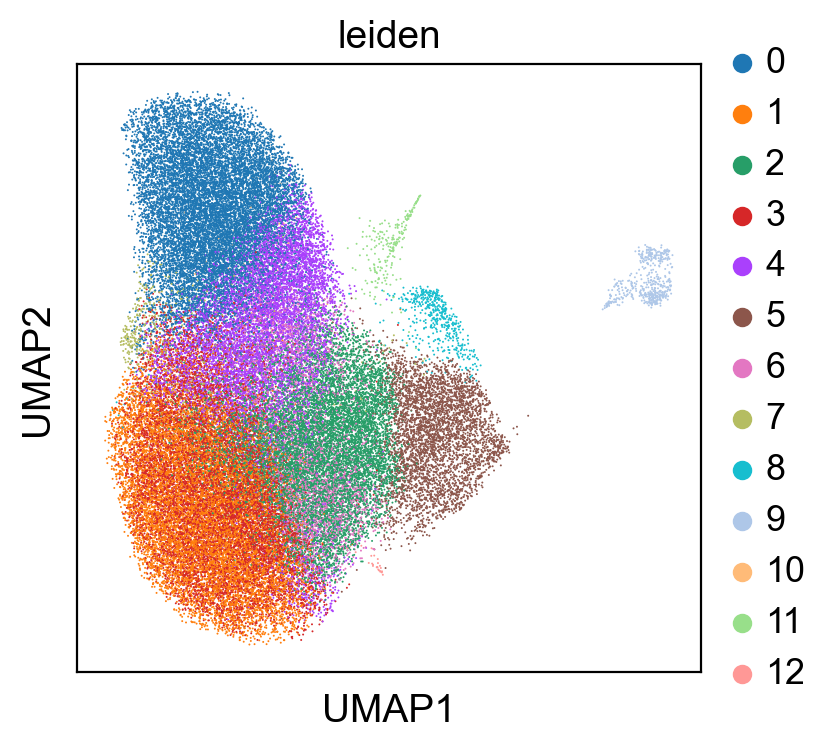

In [9]:
sc.pl.umap(B, color=['leiden'], size=2, add_outline=False)


In [10]:
markerdict = dict()

markerdict["T"] = ["CD3E","CD3D", "CD3G"]
markerdict["Naive T"] = ["LEF1","IL7R"]
markerdict["CD4"] = ["CD4"]
markerdict["CD8"] = ["CD8A", "CD8B"]
markerdict["TREG"] = ["FOXP3"]
markerdict["γδ T"] = ["TRDC","TRGC2"]
markerdict["MAIT"] = ["KLRB1"]
markerdict["NK"] = ["NKG7", "NCAM1"]
markerdict["B"] = ["MS4A1", "CD79A"]
markerdict["PCs"] = ["JCHAIN", "MZB1", "TNFRSF17"]
markerdict["pDCs"] = ["IRF7", "TCF4"]
markerdict["Myeloid"] = ["LYZ"]
markerdict["CD14"] = ["CD14"]
markerdict["CD16"] = ["FCGR3A"]
markerdict["DC"] = ["CD1C", "CST3", "FCER1G"]
markerdict["MGK"] = ["PPBP","PF4"]
markerdict["RBC"] = ["HBB"]
markerdict["HSC"] = ["CD34"]
markerdict["Eryth"] = ["ALAS2"]
markerdict["Prolif"] = ["MKI67"]
markerdict["HSC"] = ["CD34"]
markerdict["ISG"] = ["IFI44L", "ISG15", "IFI6", "IFI27", "IFI44"]


In [11]:
sc.tl.dendrogram(B, groupby='leiden')

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_leiden']`


categories: 0, 1, 2, etc.
var_group_labels: T, Naive T, CD4, etc.


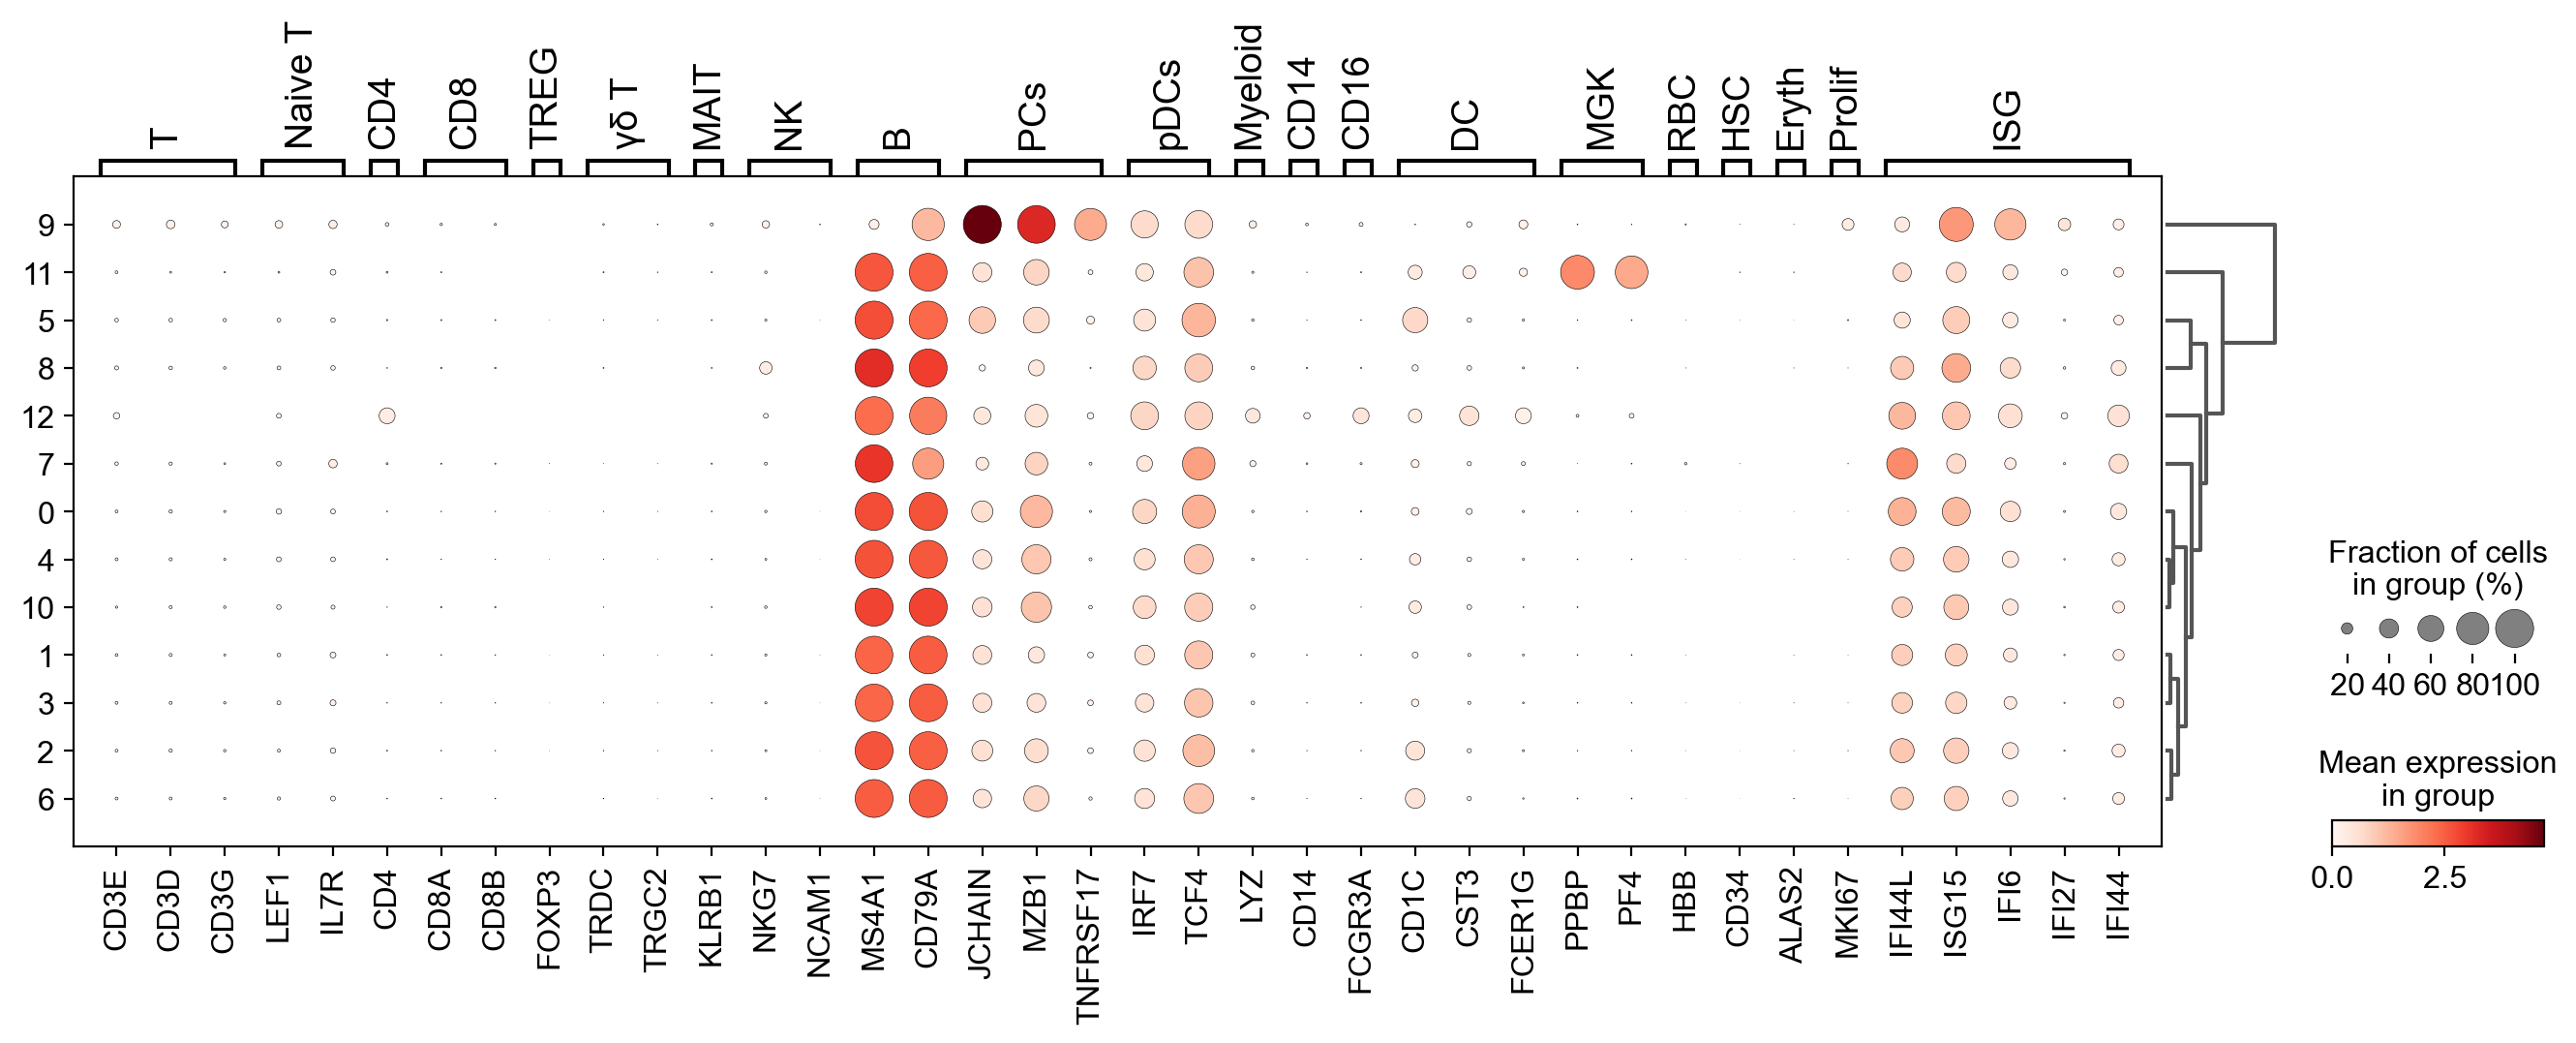

In [12]:
with rc_context({'figure.figsize': (5, 5)}):
    sc.pl.dotplot(B, markerdict,  
                  groupby='leiden', dendrogram=True);

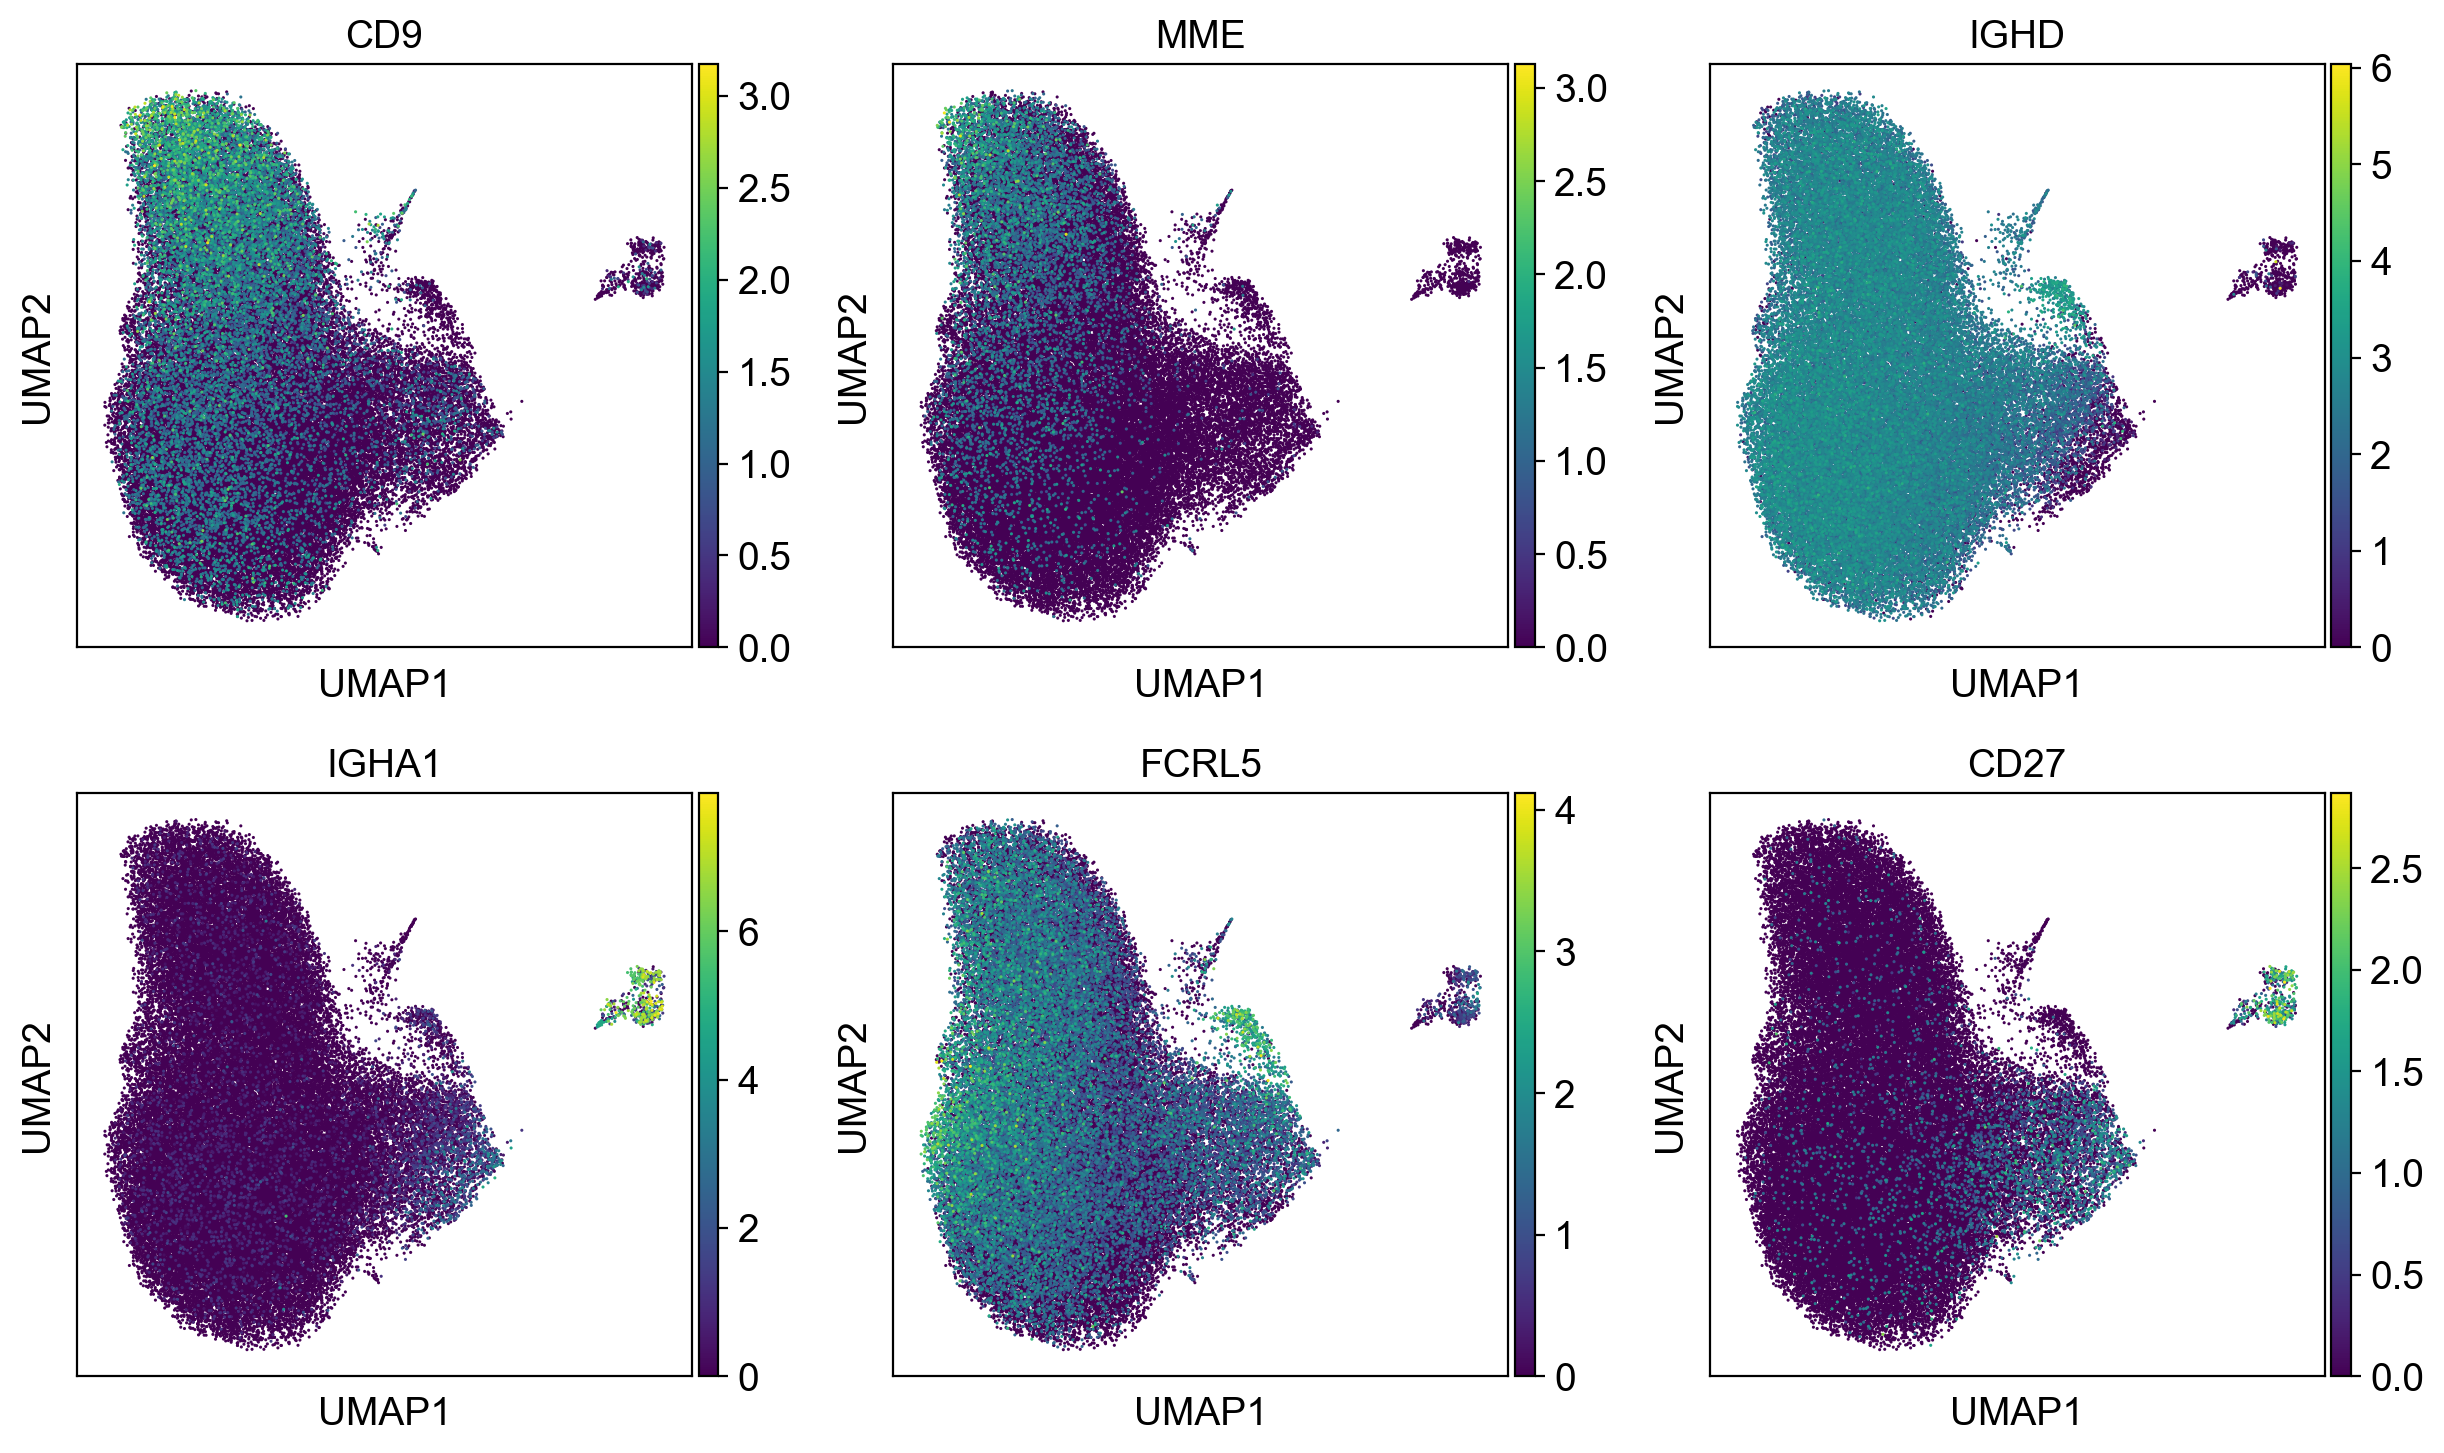

In [13]:
sc.pl.umap(B, color=['CD9', 'MME', "IGHD", 'IGHA1', 'FCRL5', 'CD27'], size=5, ncols=3, add_outline=False)


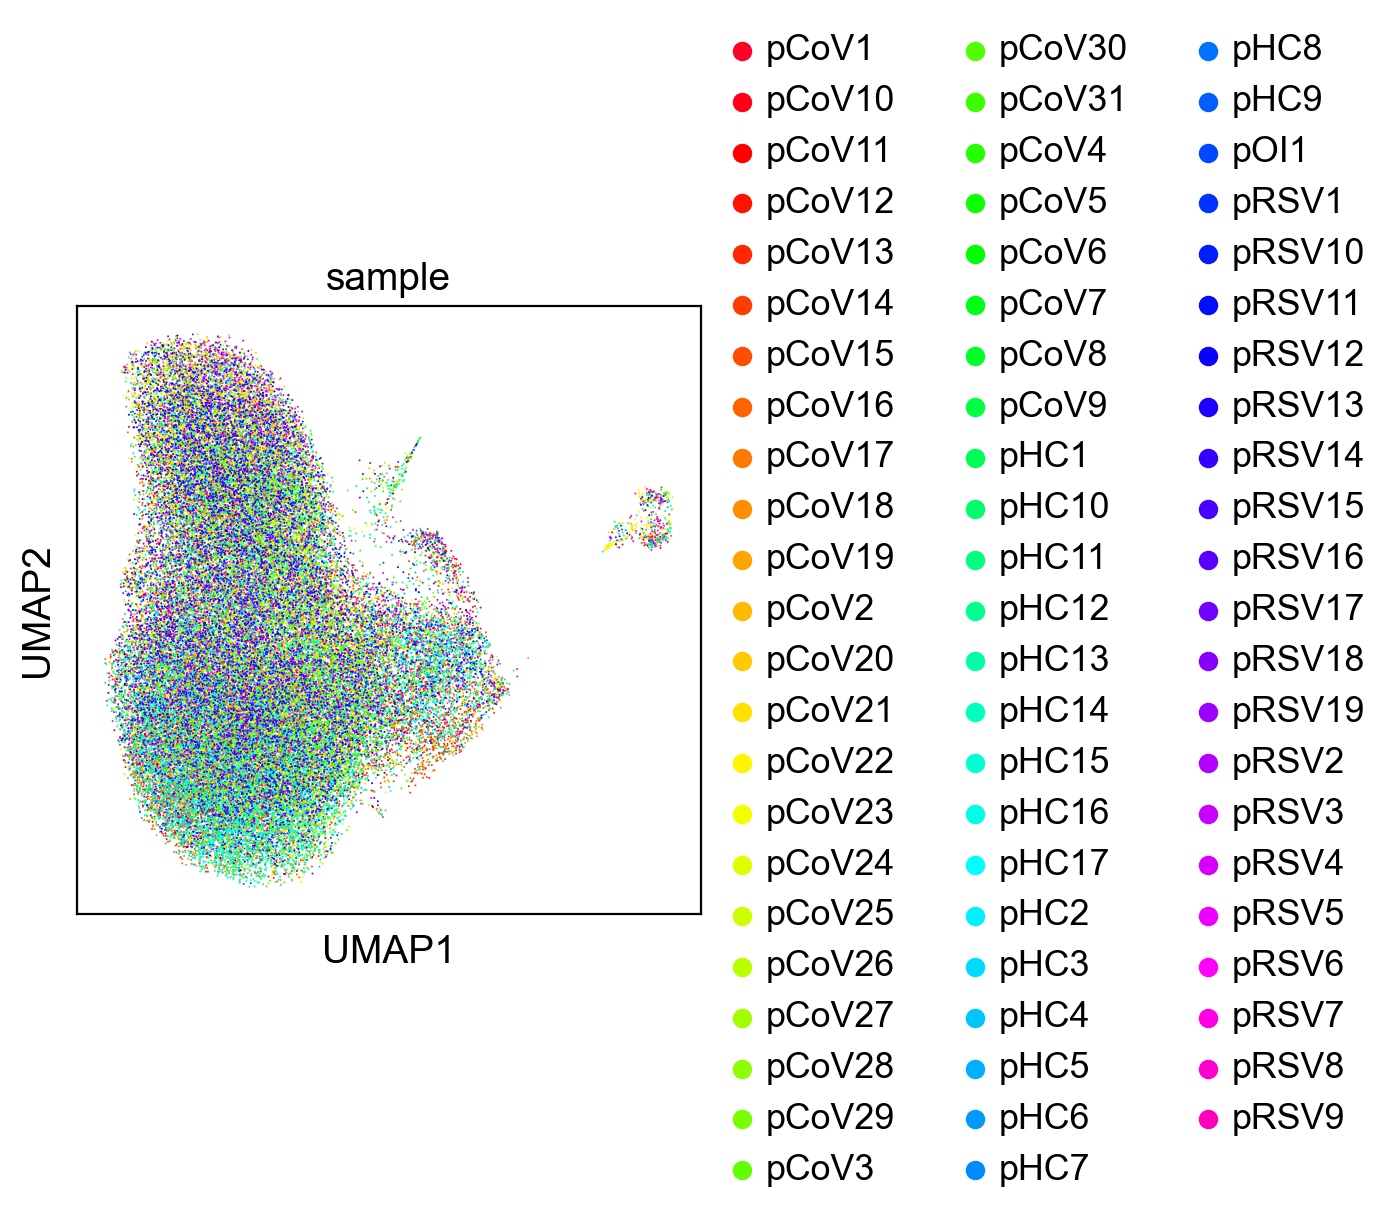

In [14]:
sc.pl.umap(B, color=['sample'], size=2, add_outline=False)


ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:01:59)


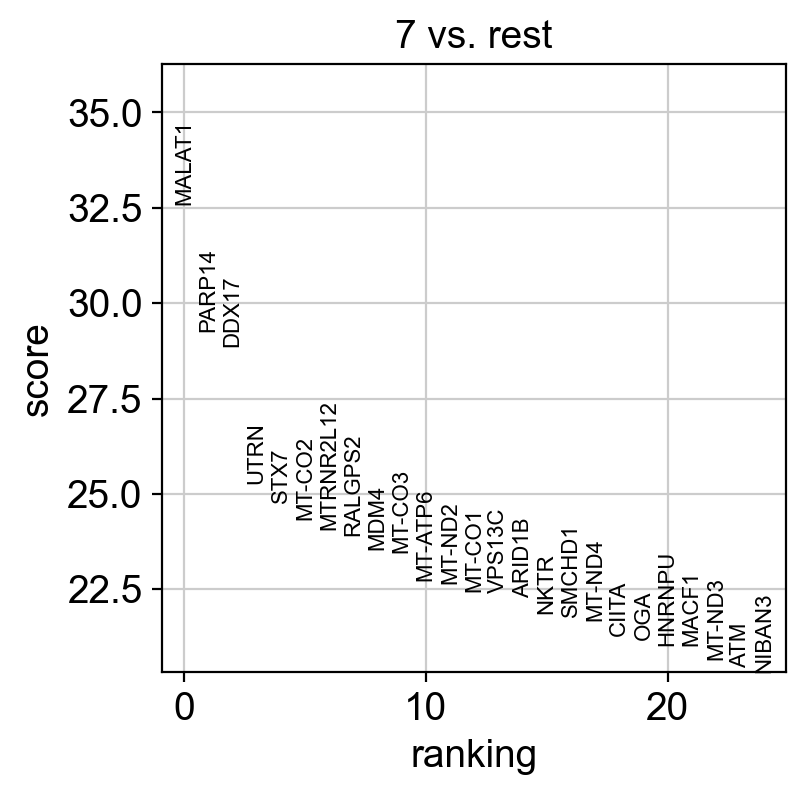

In [15]:
sc.tl.rank_genes_groups(B, 'leiden', method='wilcoxon', groups=['7'])
sc.pl.rank_genes_groups(B, n_genes=25, sharey=False)


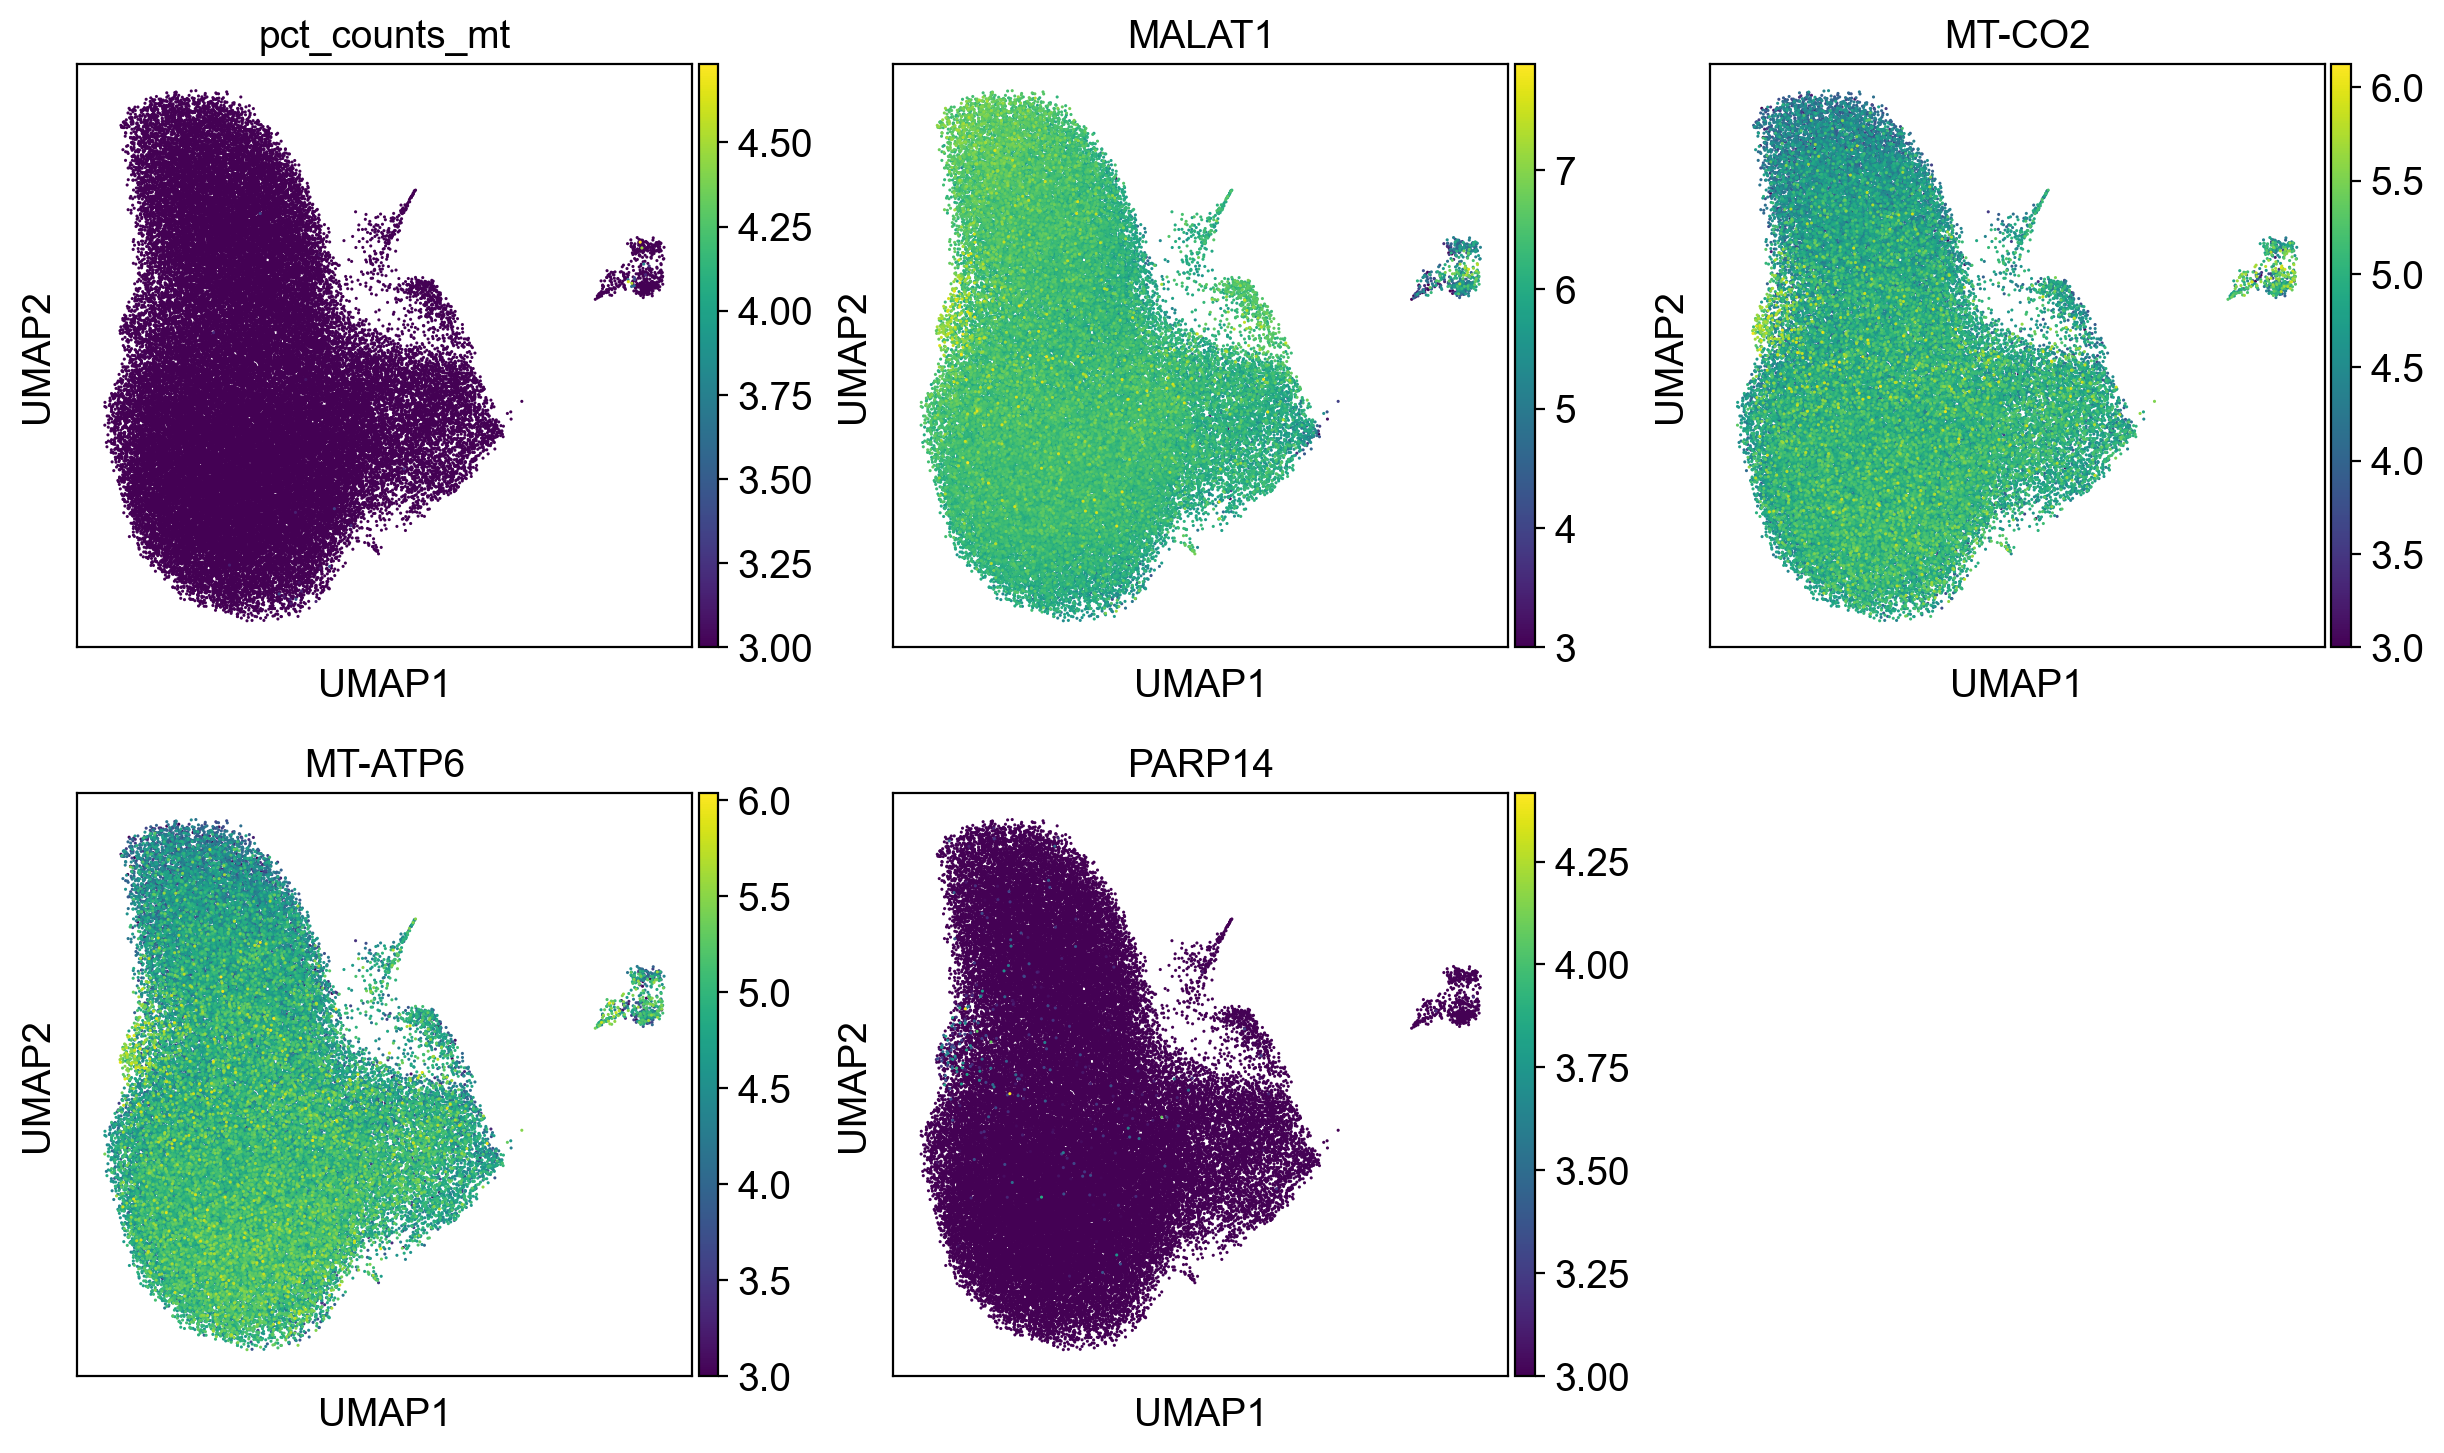

In [16]:
sc.pl.umap(B, color=['pct_counts_mt', 'MALAT1', 'MT-CO2', 'MT-ATP6', 'PARP14'], vmin=3, size=5, ncols=3, add_outline=False)


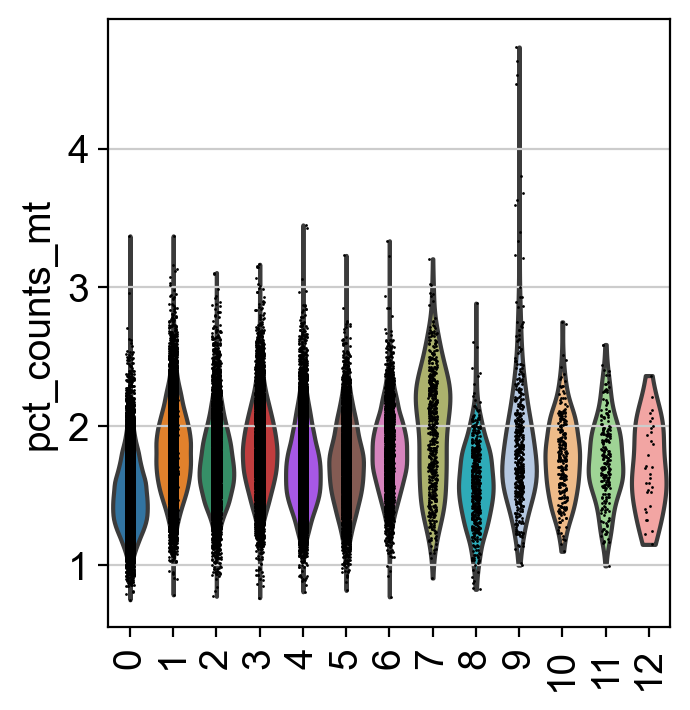

In [17]:
sc.pl.violin(B, keys='pct_counts_mt', groupby='leiden', rotation=90)

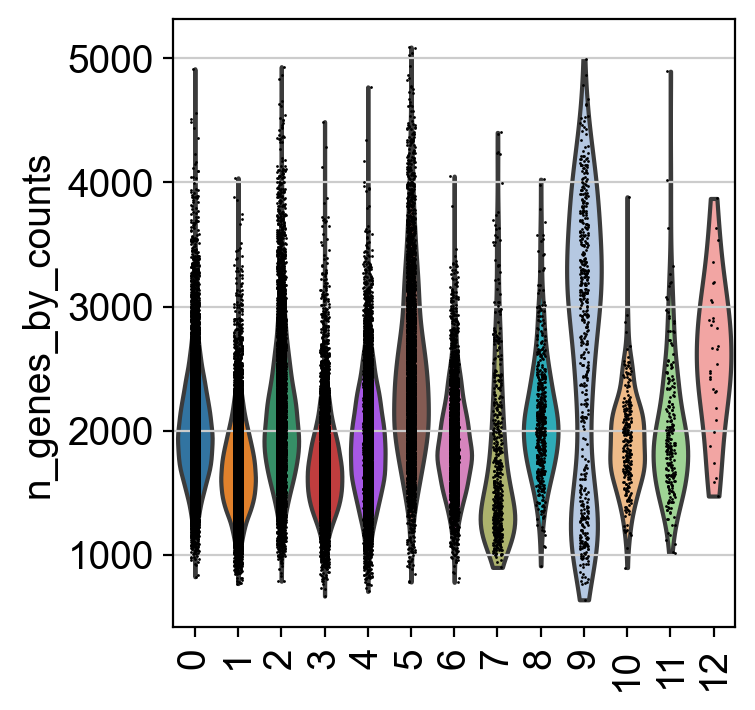

In [18]:
sc.pl.violin(B, keys='n_genes_by_counts', groupby='leiden', rotation=90)

In [19]:
sum(B.obs['leiden'] == '11')

227

In [20]:
sum(B.obs['leiden'] == '12')

32

In [21]:
sum(B.obs['leiden'] == '7')

583

# Summary
Drop clusters:
- 11: MGK Doublet
- 12: B + T Doublet
- 7: High MT gene, MT genes are markers

In [22]:
barcodes = B.obs.index
barcodes = barcodes[~B.obs['leiden'].isin(["11",'12','7'])]
#pd.DataFrame(barcodes).to_csv("B_Barcodes.txt", header=None, index=None)

In [23]:
sum(~B.obs['leiden'].isin(["11",'12','7']))

62074